In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
train = pd.read_csv("train_v2_final_201702.csv")

In [3]:
user_data = pd.DataFrame()
for chunk in pd.read_csv('user_logs_v2.csv', chunksize=500000):
    merged = train.merge(chunk, on='msno', how='inner')
    user_data = pd.concat([user_data, merged])

In [ ]:
user_data.sort_values(["msno","date"]).head(20)

In [ ]:
user_data['date'].max()

In [ ]:
user_data['date'].min()

The version2 only have logs for 2017 March. 

In [4]:
df_stat=user_data.groupby(['msno','is_churn']).agg(
    {'date':['count'],'num_25':['mean'],'num_50':['mean'],'num_75':['mean'],'num_985':['mean'],
     'num_100':['mean'],'num_unq':['mean'],'total_secs':['mean']})

In [5]:
df_stat.columns = df_stat.columns.droplevel(1)

In [6]:
df_stat.head(2)

,,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
msno,is_churn,,,,,,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,31,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,6210.577161
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,28,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,4121.830714


/Users/wangzhengye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


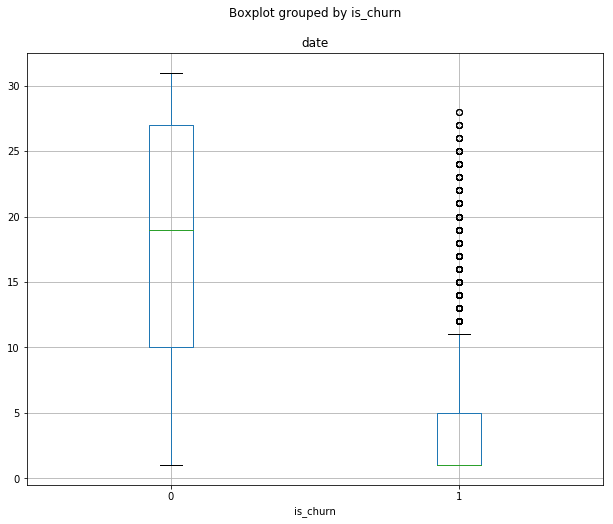

In [7]:
df_stat.boxplot(column='date',by='is_churn',figsize=(10,8))

/Users/wangzhengye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


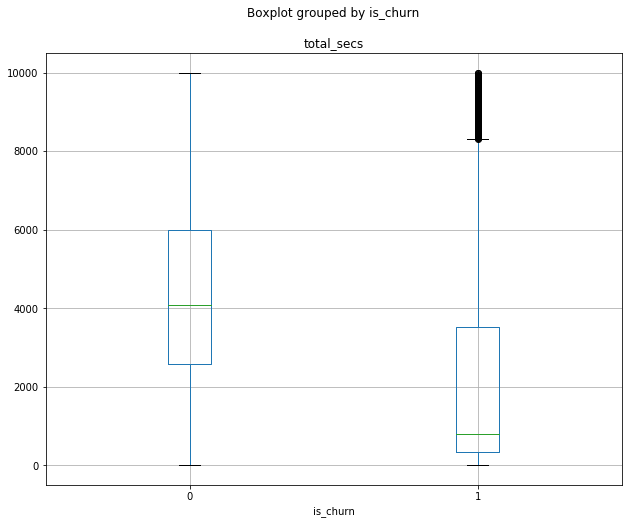

In [8]:
df_stat[df_stat.total_secs < 10000].boxplot(column='total_secs',by='is_churn',figsize=(10,8))

/Users/wangzhengye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


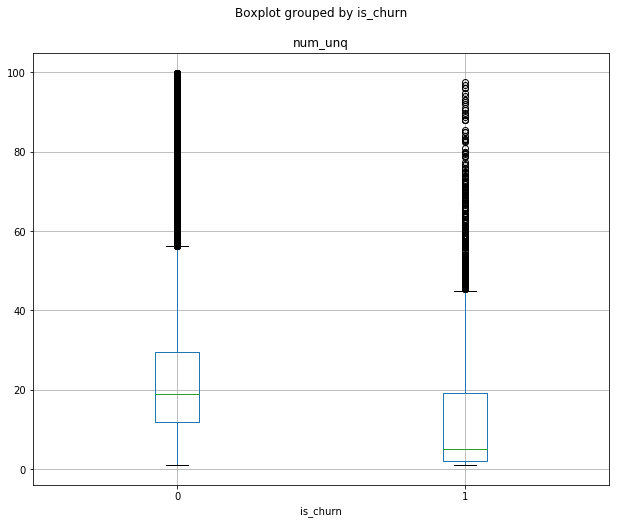

In [9]:
df_stat[df_stat.num_unq < 100].boxplot(column='num_unq',by='is_churn',figsize=(10,8))

/Users/wangzhengye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


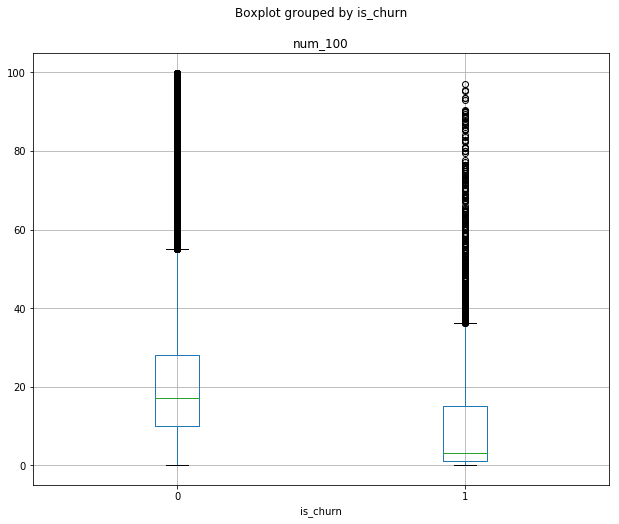

In [10]:
df_stat[df_stat.num_100 < 100].boxplot(column='num_100',by='is_churn',figsize=(10,8))